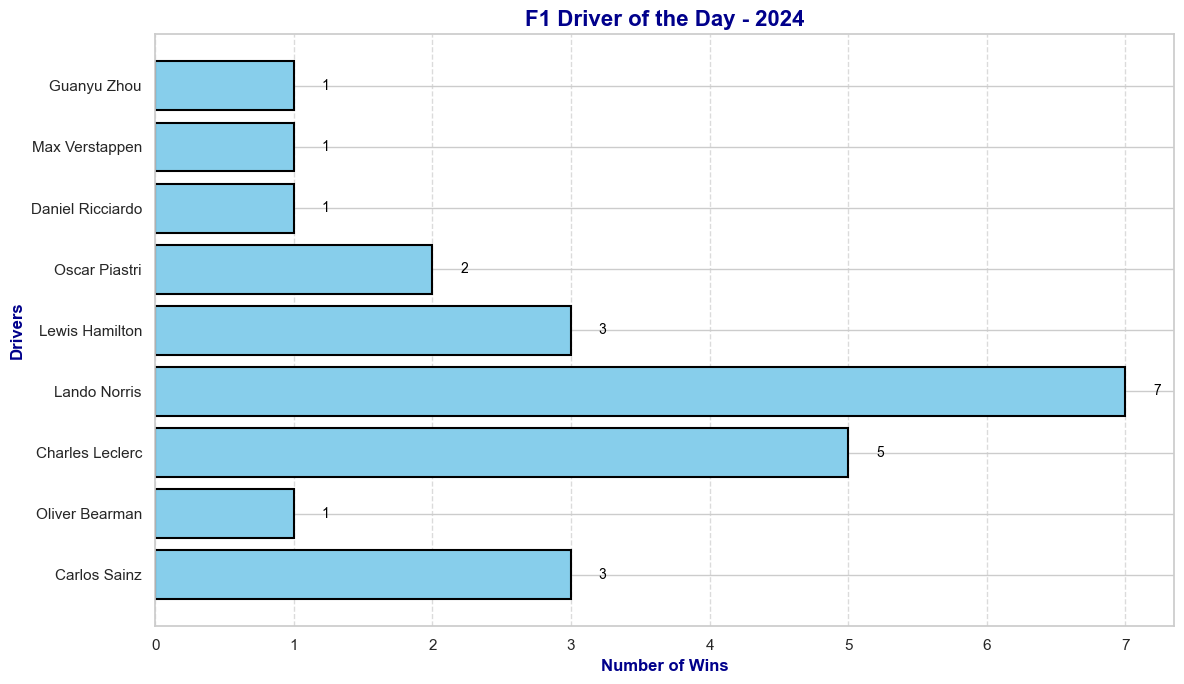

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

# Load the CSV file
data = pd.read_csv('D:/F1_Vizs/F1/DOTD_2024/DOTD_Toppers.csv')

# Extract driver names and count their occurrences
driver_counts = Counter(data['Driver'])

# Prepare data for plotting
driver_names = list(driver_counts.keys())
counts = list(driver_counts.values())

# Create a bar chart
plt.figure(figsize=(12, 7))
bars = plt.barh(driver_names, counts, color='skyblue', edgecolor='black', linewidth=1.5)

# Enhance the chart
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.title('F1 Driver of the Day - 2024', fontsize=16, fontweight='bold', color='darkblue')
plt.xlabel('Number of Wins', fontsize=12, fontweight='bold', color='darkblue')
plt.ylabel('Drivers', fontsize=12, fontweight='bold', color='darkblue')

# Add value labels to the bars
for bar in bars:
    plt.text(bar.get_width() + 0.2, bar.get_y() + bar.get_height() / 2, f'{bar.get_width()}', va='center', ha='left', fontsize=10, color='black')

# Show plot
plt.tight_layout()
plt.show()


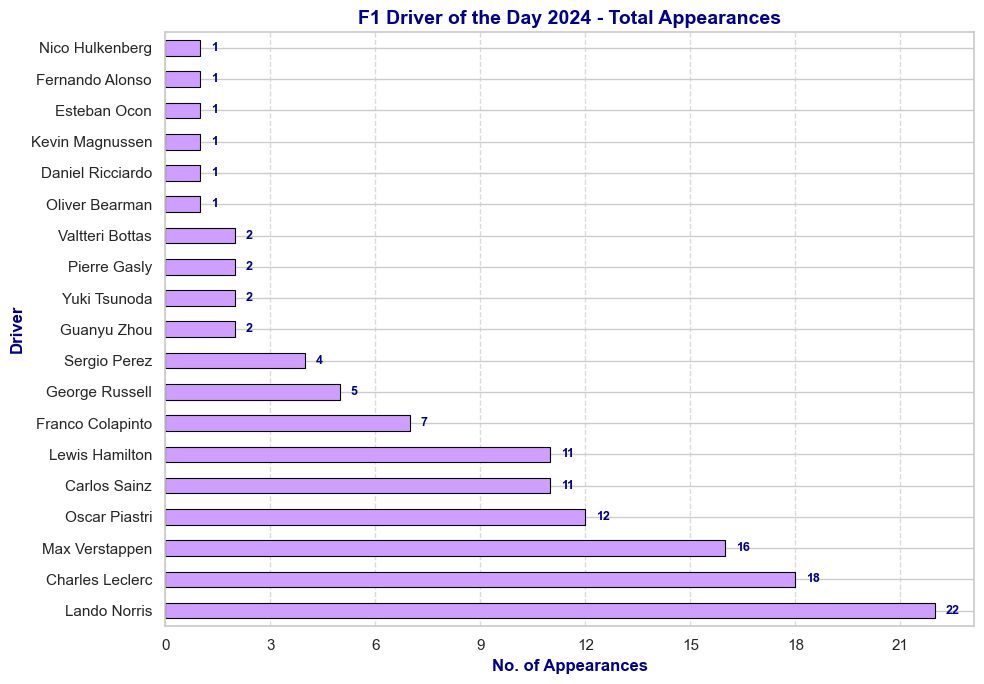

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

# Load data from CSV 
file_path = r"D:\F1_Vizs\F1\DOTD_2024\F1_DOTD_2024.csv"
df = pd.read_csv(file_path)

# Combine all ranking columns to count total appearances of each driver
position_columns = ["FirstPlace", "SecondPlace", "ThirdPlace", "FourthPlace", "FifthPlace"]
all_positions = pd.concat([df[col] for col in position_columns])

# Count the no. of appearances for each driver
driver_appearances = all_positions.value_counts()

# Plot setup
fig, ax = plt.subplots(figsize=(10, 7))
bars = driver_appearances.plot(kind="barh", color="#CF9FFF", edgecolor="black", linewidth=0.8, ax=ax)

# Styling
ax.set_title("F1 Driver of the Day 2024 - Total Appearances", fontsize=14, fontweight="bold", color="darkblue")
ax.set_xlabel("No. of Appearances", fontsize=12, fontweight="bold", color="darkblue")
ax.set_ylabel("Driver", fontsize=12, fontweight="bold", color="darkblue")
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Ensure whole numbers on x-axis

# Add value labels to each bar
for bar in bars.patches:
    ax.text(bar.get_width() + 0.3, bar.get_y() + bar.get_height()/2, str(int(bar.get_width())), fontsize=9, va='center', fontweight="bold", color="darkblue")

# Enhance layout and display plot
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


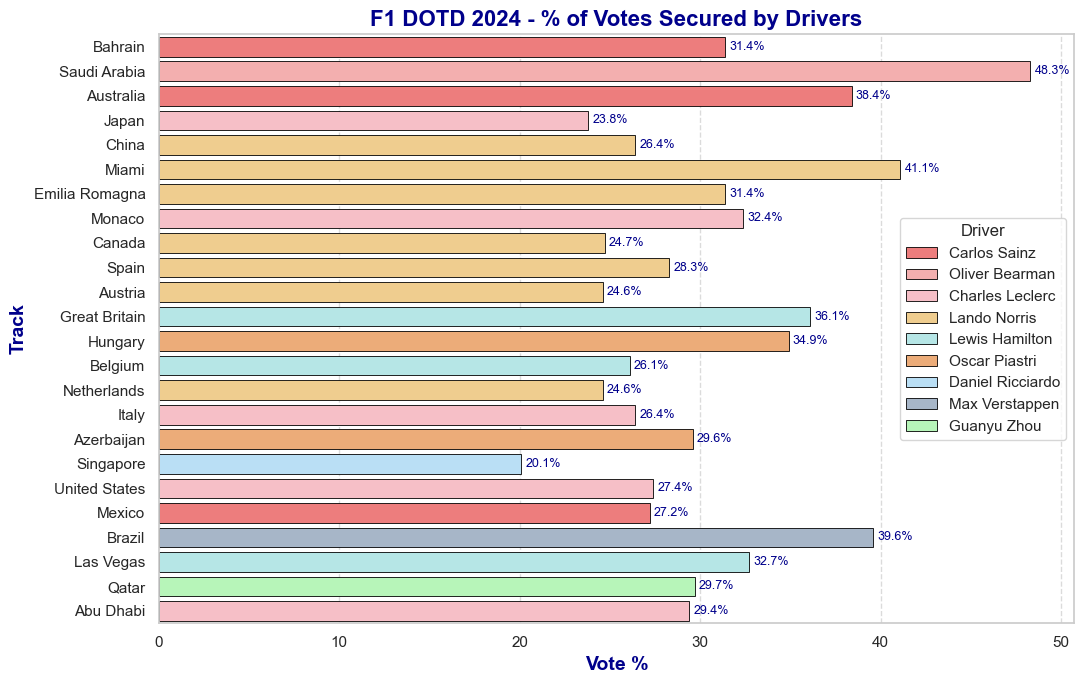

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load data from CSV
file_path = r"D:\F1_Vizs\F1\DOTD_2024\DOTD_Toppers.csv"
df = pd.read_csv(file_path)

# Custom colors for each driver
driver_colors = {
    "Carlos Sainz": "#FF6B6B",      
    "Oliver Bearman": "#FFA3A3",    
    "Charles Leclerc": "#FFB6C1",    
    "Lando Norris": "#FFD27F",      
    "Oscar Piastri": "#FFAA66",     
    "Lewis Hamilton": "#AEEEEE",     
    "Daniel Ricciardo": "#B0E2FF",   
    "Max Verstappen": "#A2B5CD",     
    "Guanyu Zhou": "#ADFFB0"         
}

# Set seaborn style
sns.set(style="whitegrid")

# Create bar chart
fig, ax = plt.subplots(figsize=(11, 7))
sns.barplot(
    x="Vote%", y="Track", hue="Driver", data=df, palette=driver_colors, edgecolor="black", linewidth=0.6, ax=ax
)

# Add vote % labels on bars
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", fontsize=9, padding=3, color="darkblue")

# Titles and labels
ax.set_title("F1 DOTD 2024 - % of Votes Secured by Drivers", fontsize=16, fontweight="bold", color="darkblue")
ax.set_xlabel("Vote %", fontsize=14, fontweight="bold", color="darkblue")
ax.set_ylabel("Track", fontsize=14, fontweight="bold", color="darkblue")

# Grid styling
ax.grid(axis="x", linestyle="--", alpha=0.7)

# Improve layout and show plot
plt.tight_layout()
plt.show()


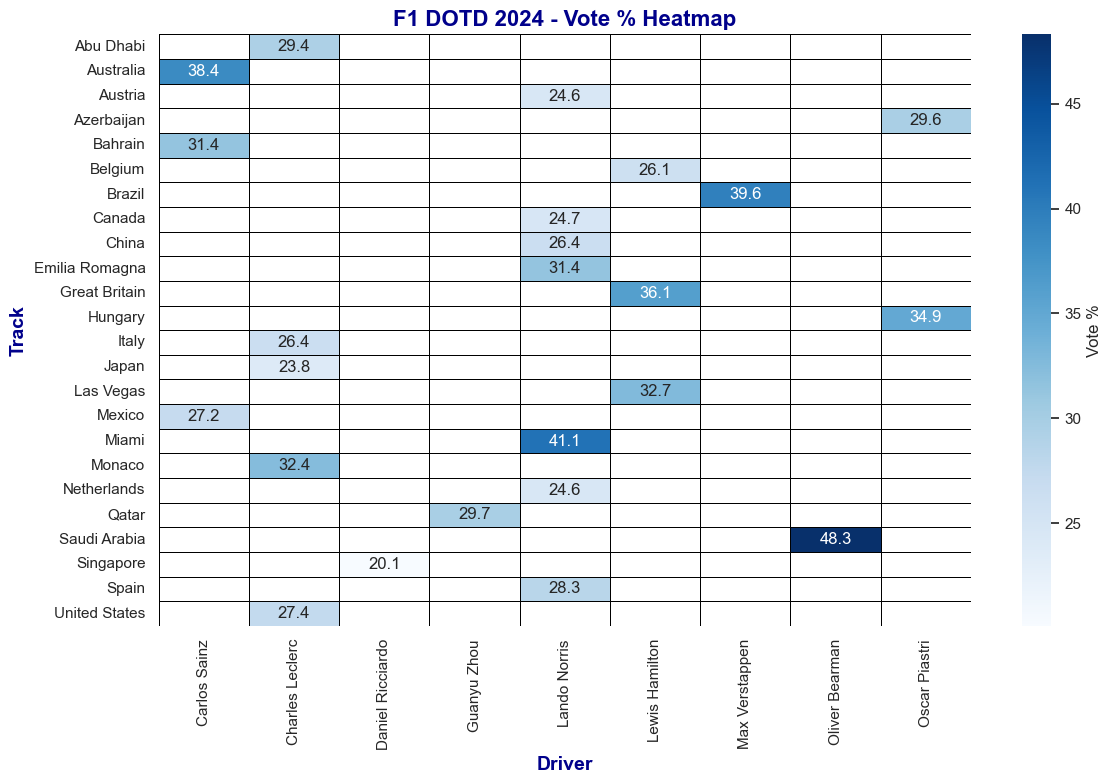

In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV
file_path = r"D:\F1_Vizs\F1\DOTD_2024\DOTD_Toppers.csv"
df = pd.read_csv(file_path)

# Reshape data
heatmap_data = df.pivot(index="Track", columns="Driver", values="Vote%")

# Create heatmap
fig, ax = plt.subplots(figsize=(12, 8))
sns.heatmap(
    heatmap_data, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5, 
    linecolor="black", cbar_kws={"label": "Vote %"}, ax=ax
)

# Styling
ax.set_title("F1 DOTD 2024 - Vote % Heatmap", fontsize=16, fontweight="bold", color="darkblue")
ax.set_xlabel("Driver", fontsize=14, fontweight="bold", color="darkblue")
ax.set_ylabel("Track", fontsize=14, fontweight="bold", color="darkblue")
ax.grid(False)

# Show the plot
plt.tight_layout()
plt.show()


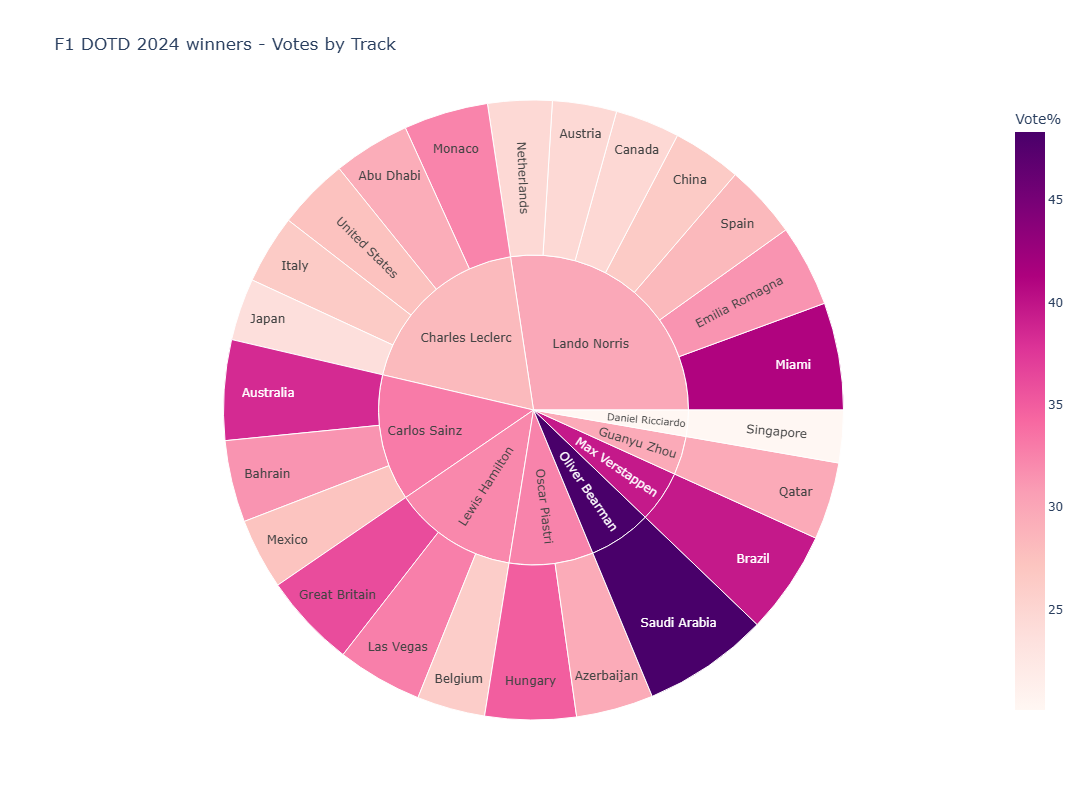

In [21]:
import pandas as pd
import plotly.express as px

# Load data from CSV
file_path = r"D:/F1_Vizs/F1/DOTD_2024/DOTD_Toppers.csv"
df = pd.read_csv(file_path)

# Create Sunburst chart
fig = px.sunburst(
    df, 
    path=["Driver", "Track"],  # Hierarchical structure (Driver -> Track)
    values="Vote%",           
    color="Vote%",             
    color_continuous_scale="RdPu", 
    title="F1 DOTD 2024 winners - Votes by Track",
    width=1000,  
    height=800  
)

# Display plot
fig.show()


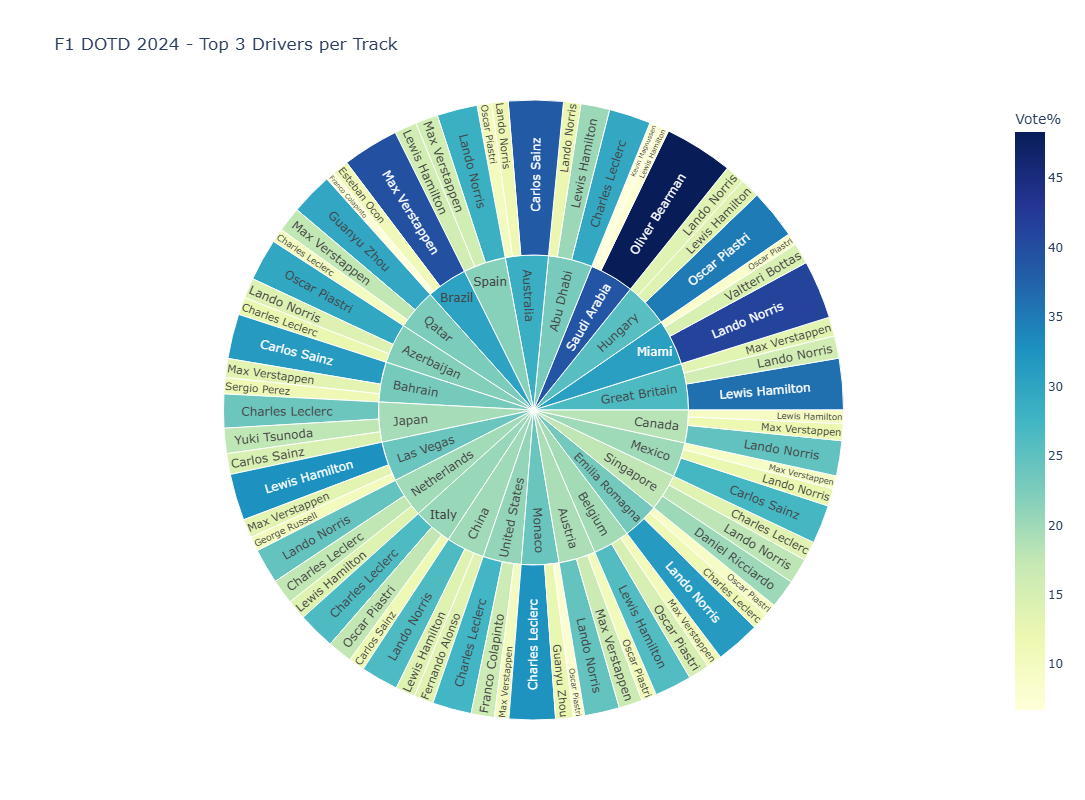

In [22]:
import pandas as pd
import plotly.express as px

# Load data from CSV
file_path = r"D:\F1_Vizs\F1\DOTD_2024\F1_DOTD_2024.csv"
df = pd.read_csv(file_path)

# Prepare data for the Sunburst chart
sunburst_data = []

# Extract the top 3 drivers per track along with their vote %
for _, row in df.iterrows():
    track = row["Track"]
    
    sunburst_data.extend([
        {"Track": track, "Driver": row["FirstPlace"], "Vote%": row["FirstPlace(%)"]},
        {"Track": track, "Driver": row["SecondPlace"], "Vote%": row["SecondPlace(%)"]},
        {"Track": track, "Driver": row["ThirdPlace"], "Vote%": row["ThirdPlace(%)"]}
    ])

# Convert extracted data into a dataframe
sunburst_df = pd.DataFrame(sunburst_data)

# Create the Sunburst chart
fig = px.sunburst(
    sunburst_df, 
    path=["Track", "Driver"],  # Hierarchical structure: Track -> Driver
    values="Vote%",  
    color="Vote%",  
    color_continuous_scale="YlGnBu", 
    title="F1 DOTD 2024 - Top 3 Drivers per Track",
    width=1000, 
    height=800,
    hover_data={"Track": True, "Driver": True, "Vote%": True}
)

# Show plot
fig.show()
